<a href="https://colab.research.google.com/github/olasupoAjayi/GenderEquitableAI/blob/main/Paper3_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Reading libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Health_NLP/Codes/Annotated_English_v1.csv")

In [ ]:
data1 = raw_data.copy()
print(data1.shape)
data1.head()

(482, 243)


,Unnamed: 0,age,gender,language,askmarital,asklocation,askhavekids,howmanykids,nationality,ethnicity,...,tonsilitis,toothache_,treatment/medication,typhoid,vaginal itching,virginia_,vomiting_,weakness.1,weakness \nloss of appetite,wheezing
0,NaN,25,woman,eng,Single,town,haskids,1,Nigerian,Igbo,...,0,0,0,0,0,0,0,0,0,0
1,NaN,23,woman,eng,Single,town,nokids,NaN,Nigerian,Yoruba,...,0,0,0,0,0,0,0,0,0,0
2,NaN,25,woman,eng,Single,town,nokids,NaN,Nigerian,Yoruba,...,0,0,0,0,0,0,0,1,0,0
3,NaN,42,man,eng,Married,town,nokids,NaN,Nigerian,Others,...,0,0,0,0,0,0,0,0,0,0
4,NaN,25,woman,eng,Married,town,haskids,2,Nigerian,Yoruba,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
original_headers = data1.columns[1:44]

In [ ]:
original_headers

Index(['age', 'gender', 'language', 'askmarital', 'asklocation', 'askhavekids',
       'howmanykids', 'nationality', 'ethnicity', 'askeducation', 'askincome',
       'askemployment', 'healthaccess', 'typeofhealthcare', 'socialsupport',
       'details', 'askfamilysupport', 'wellness', 'symptoms',
       'howlongsymptoms', 'gettingbetterorworse', 'familysymptoms',
       'whichfamily', 'overallhealth', 'medicines', 'medicinescurrent',
       'medicinesrecent', 'smoke', 'howoftensmoke', 'alcohol',
       'howoftenalcohol', 'sex', 'partners', 'surgeries', 'describesurgeries',
       'inclusion', 'equity', 'diversity', 'genderjusticesafety',
       'genderjusticecomfort', 'harassment', 'discrimination',
       'refusedtreatment'],
      dtype='object')

In [ ]:
num = ['age', 'gender', 'askmarital', 'asklocation', 'askhavekids', 'nationality', 'ethnicity', 'askeducation', 'askincome', 'askemployment', 'healthaccess', 'typeofhealthcare', 'socialsupport',
       'askfamilysupport', 'overallhealth', 'medicines', 'smoke', 'howoftensmoke', 'alcohol', 'howoftenalcohol', 'sex', 'partners', 'surgeries', 'inclusion', 'equity', 'diversity', 'genderjusticesafety', 'harassment', 'discrimination', 'refusedtreatment']

In [ ]:
dv = data1[num]
dv.head(4)

,age,gender,askmarital,asklocation,askhavekids,nationality,ethnicity,askeducation,askincome,askemployment,...,sex,partners,surgeries,inclusion,equity,diversity,genderjusticesafety,harassment,discrimination,refusedtreatment
0,25,woman,Single,town,haskids,Nigerian,Igbo,secondary,level6,unemployed,...,no-sex,NaN,no-surgeries,Agree,Agree,Agree,Agree,Agree,Agree,Disagree
1,23,woman,Single,town,nokids,Nigerian,Yoruba,tertiary,level5,unemployed,...,no-sex,NaN,no-surgeries,Moderately agree,Moderately agree,Neutral,Moderately agree,Disagree,Disagree,Disagree
2,25,woman,Single,town,nokids,Nigerian,Yoruba,secondary,level6,unemployed,...,no-sex,NaN,no-surgeries,Agree,Agree,Neutral,Neutral,Agree,Neutral,Disagree
3,42,man,Married,town,nokids,Nigerian,Others,others,level6,selfemployed,...,yes-sex,yes-multiple-partners,no-surgeries,Neutral,Moderately agree,Neutral,Moderately agree,Agree,Agree,Agree


In [ ]:
#Encoding

lb  = LabelEncoder()

for i in num:
  dv[i].dropna()
  dv[i] = lb.fit_transform(dv[i])


In [ ]:
dv.diversity

#VISUALIZATION

In [ ]:
#bar chart drawer

def draw_barChart(x, y, title, xlabel, ylabel):
  plt.bar(x, y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

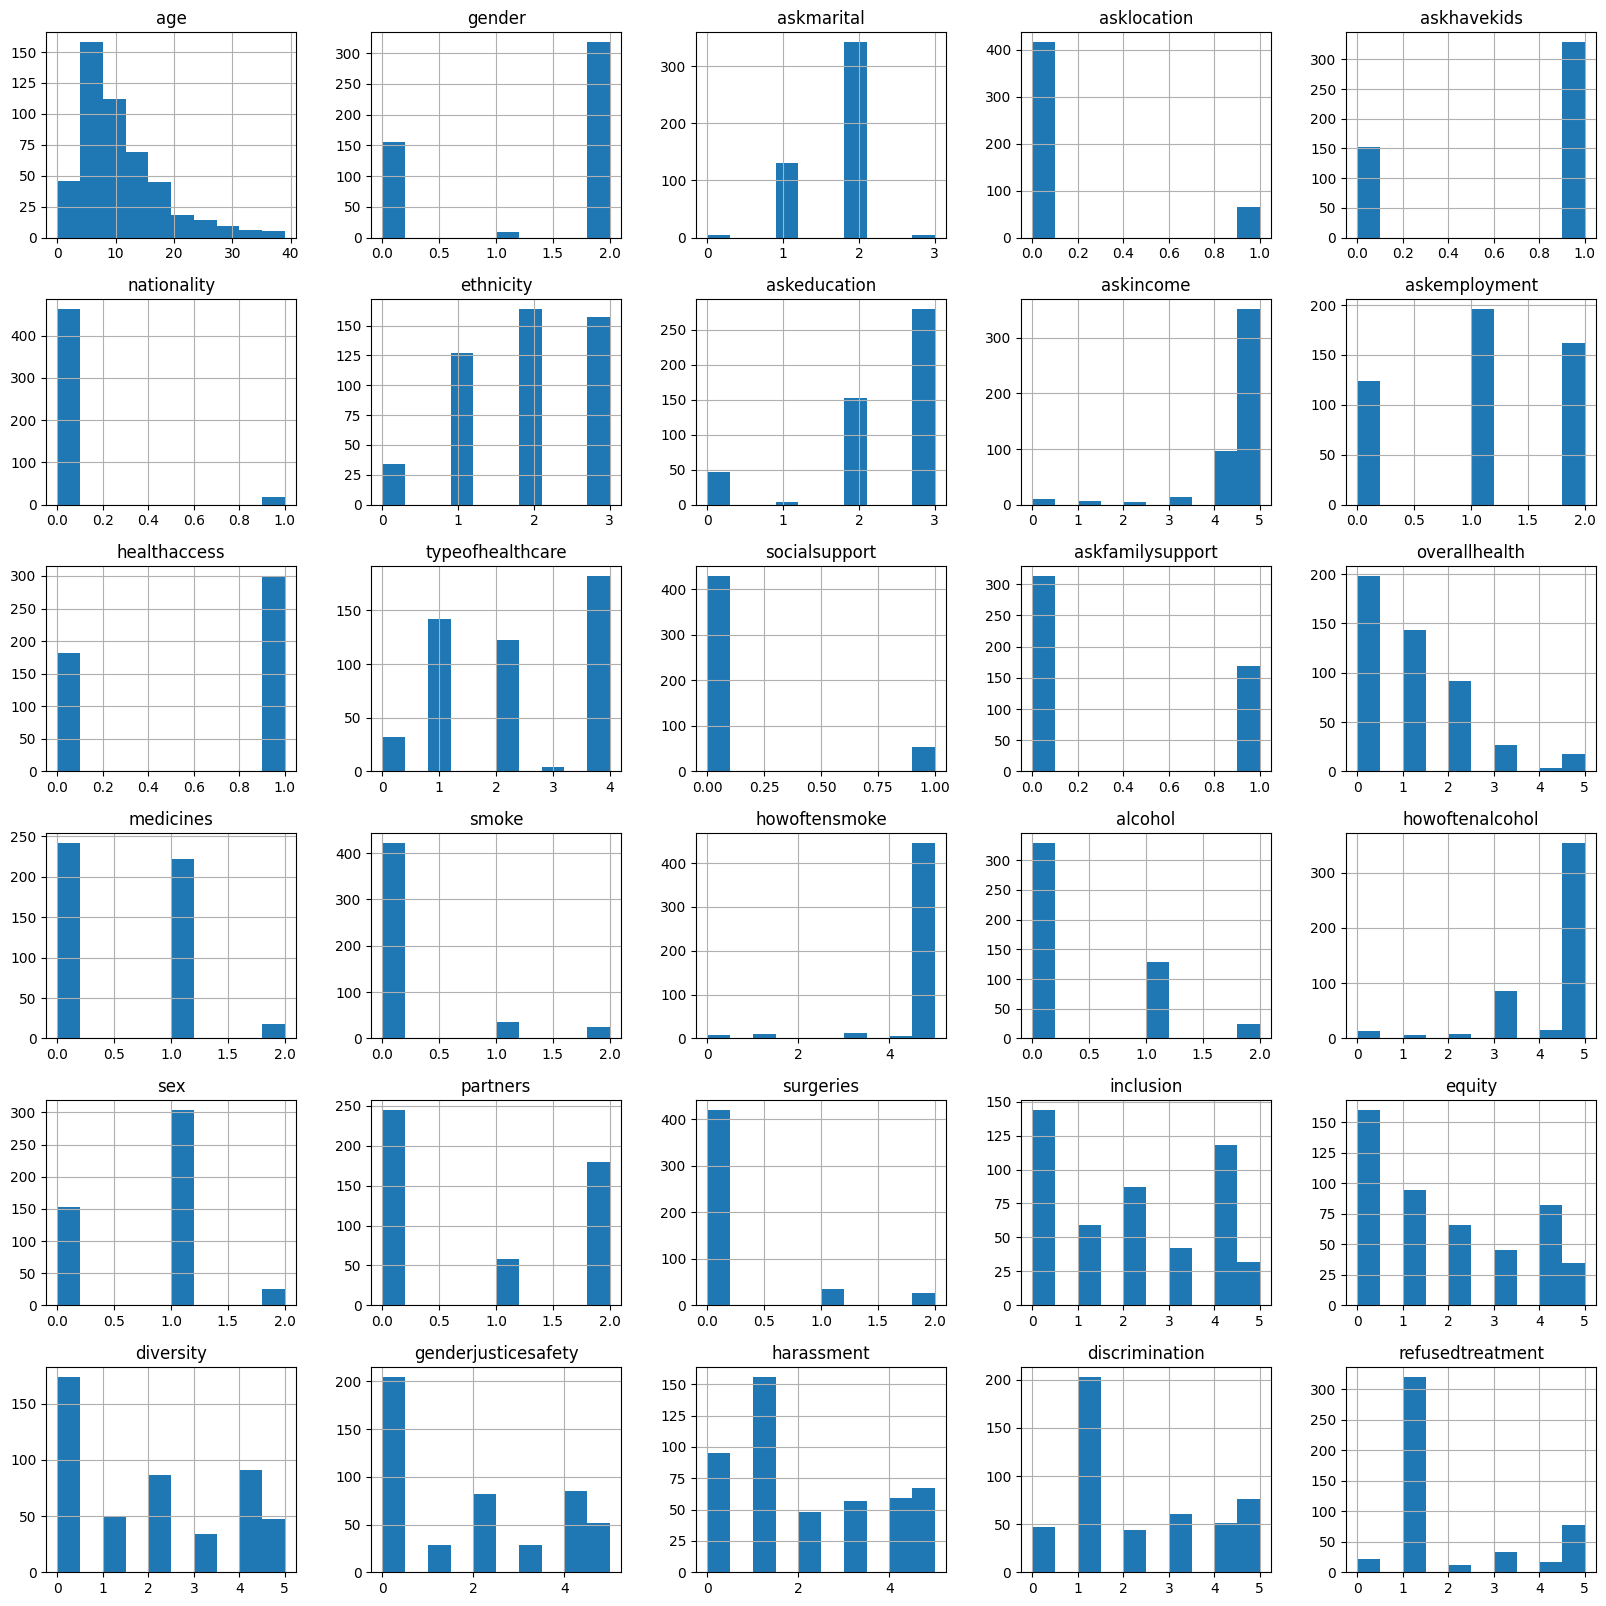

In [ ]:
dv.hist(figsize=(20,20))
plt.show()

[0 1 2 3 4 5] [198 143  92  27   4  18]


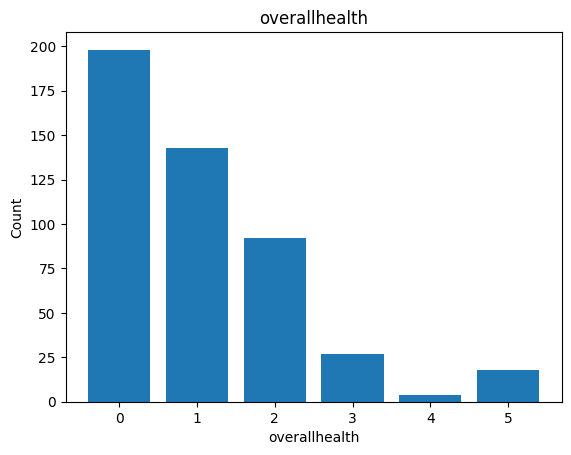

In [ ]:
overallhealth, freq = np.unique(dv.overallhealth.dropna(), return_counts = True)

print (overallhealth, freq)

draw_barChart(overallhealth, freq, title = 'overallhealth', xlabel = 'overallhealth', ylabel = 'Count')

[0 1 2] [242 222  18]


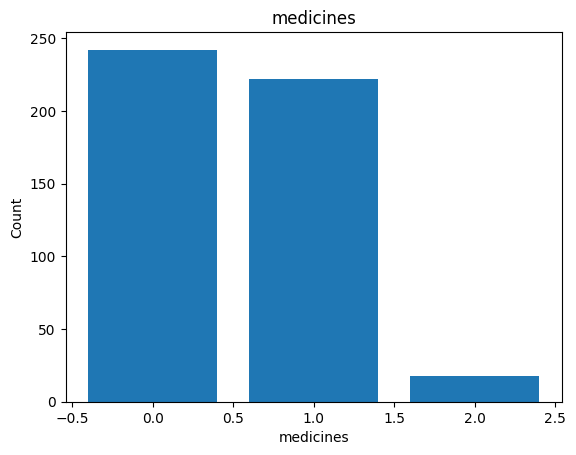

In [ ]:
medicines, freq = np.unique(dv.medicines.dropna(), return_counts = True)

print (medicines, freq)

draw_barChart(medicines, freq, title = 'medicines', xlabel = 'medicines', ylabel = 'Count')

In [ ]:
np.unique(data1.medicines.dropna(), return_counts=1)

(array(['no-medicines', 'yes-medicines'], dtype=object), array([242, 222]))

In [ ]:
askincome, freq = np.unique(dv.askincome.dropna(), return_counts = True)

print (askincome, freq)

['level1' 'level2' 'level3' 'level4' 'level5' 'level6'] [ 10   7   4  13  96 352]


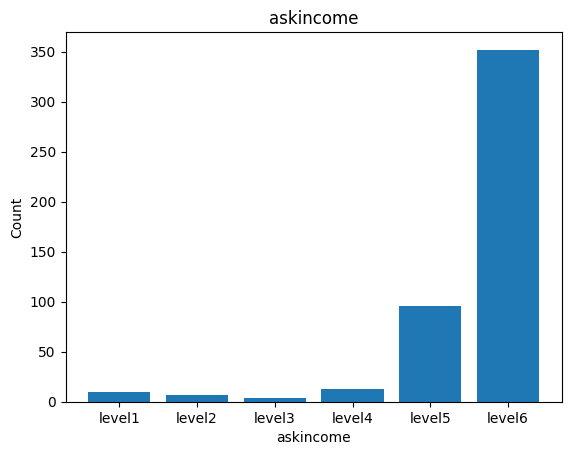

In [ ]:
draw_barChart(askincome, freq, title = 'askincome', xlabel = 'askincome', ylabel = 'Count')

# ASSOCIATIVITY

## PEARSON - MONOLYTIC

In [ ]:
from scipy.stats import pearsonr

pcc_col = ['age', 'gender', 'askmarital', 'asklocation','askeducation', 'askincome', 'askemployment', 'ethnicity']

for indx in range(len(pcc_col)):
  _x = pcc_col[indx]
  X = dv[_x]
  for attr in pcc_col:
    if _x == attr:
      continue
    else:
      _y = attr
      Y = dv[_y]

      # calculate pearson's correlation
      coef, p = pearsonr(X, Y)
      print('\nPearsons corr. {0} vs {1} is {2:.5f}'.format(_x, _y, coef))

      # interpret the significance
      alpha = 0.05
      if p > alpha:
	      print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
      else:
	      print('Samples are correlated (reject H0) p=%.5f' % p)


Pearsons corr. age vs gender is -0.22585
Samples are correlated (reject H0) p=0.00000

Pearsons corr. age vs askmarital is -0.46553
Samples are correlated (reject H0) p=0.00000

Pearsons corr. age vs asklocation is 0.14938
Samples are correlated (reject H0) p=0.00100

Pearsons corr. age vs askeducation is -0.01694
Samples are uncorrelated (fail to reject H0) p=0.71062

Pearsons corr. age vs askincome is -0.05656
Samples are uncorrelated (fail to reject H0) p=0.21513

Pearsons corr. age vs askemployment is -0.18892
Samples are correlated (reject H0) p=0.00003

Pearsons corr. age vs ethnicity is 0.00558
Samples are uncorrelated (fail to reject H0) p=0.90280

Pearsons corr. gender vs age is -0.22585
Samples are correlated (reject H0) p=0.00000

Pearsons corr. gender vs askmarital is -0.02575
Samples are uncorrelated (fail to reject H0) p=0.57283

Pearsons corr. gender vs asklocation is -0.03448
Samples are uncorrelated (fail to reject H0) p=0.45012

Pearsons corr. gender vs askeducation 

## SPEARMAN - LIKERTS


In [ ]:
# calculate the spearman's correlation between two variables

from scipy.stats import spearmanr

#spearman on the likert attributes
likerts = ['inclusion', 'equity', 'diversity', 'genderjusticesafety', 'harassment', 'discrimination', 'refusedtreatment']

for indx in range(len(likerts)):
  _x = likerts[indx]
  X = dv[_x]
  for attr in likerts:
    if _x == attr:
      continue
    else:
      _y = attr
      Y = dv[_y]

      # calculate spearman's correlation
      coef, p = spearmanr(X, Y)
      print('\nSpearmans corr. {0} vs {1} is {2:.5f}'.format(_x, _y, coef))

      # interpret the significance
      alpha = 0.05
      if p > alpha:
	      print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
      else:
	      print('Samples are correlated (reject H0) p=%.5f' % p)


Spearmans corr. inclusion vs equity is 0.43951
Samples are correlated (reject H0) p=0.00000

Spearmans corr. inclusion vs diversity is 0.28531
Samples are correlated (reject H0) p=0.00000

Spearmans corr. inclusion vs genderjusticesafety is 0.27519
Samples are correlated (reject H0) p=0.00000

Spearmans corr. inclusion vs harassment is 0.22854
Samples are correlated (reject H0) p=0.00000

Spearmans corr. inclusion vs discrimination is 0.18382
Samples are correlated (reject H0) p=0.00005

Spearmans corr. inclusion vs refusedtreatment is 0.17914
Samples are correlated (reject H0) p=0.00008

Spearmans corr. equity vs inclusion is 0.43951
Samples are correlated (reject H0) p=0.00000

Spearmans corr. equity vs diversity is 0.47998
Samples are correlated (reject H0) p=0.00000

Spearmans corr. equity vs genderjusticesafety is 0.46218
Samples are correlated (reject H0) p=0.00000

Spearmans corr. equity vs harassment is 0.35300
Samples are correlated (reject H0) p=0.00000

Spearmans corr. equi

## SPEARMAN - CONTINUOUS VS LIKERT

In [ ]:
# calculate the spearman's correlation between two variables

from scipy.stats import spearmanr

#spearman on the likert vs regular attributes
likerts = ['inclusion', 'equity', 'diversity', 'genderjusticesafety', 'harassment', 'discrimination', 'refusedtreatment']
pcc_col = ['age', 'gender', 'askmarital', 'asklocation','askeducation', 'askincome', 'askemployment', 'ethnicity']

for indx in range(len(likerts)):
  _x = likerts[indx]
  X = dv[_x]

  for attr in pcc_col:
    _y = attr
    Y = dv[_y]

   # calculate spearman's correlation
    coef, p = spearmanr(X, Y)
    print('\nSpearmans corr. {0} vs {1} is {2:.5f}'.format(_x, _y, coef))

      # interpret the significance
    alpha = 0.05
    if p > alpha:
      print('Samples are uncorrelated (fail to reject H0) p=%.5f' % p)
    else:
      print('Samples are correlated (reject H0) p=%.5f' % p)


Spearmans corr. inclusion vs age is 0.05620
Samples are uncorrelated (fail to reject H0) p=0.21809

Spearmans corr. inclusion vs gender is -0.08578
Samples are uncorrelated (fail to reject H0) p=0.05986

Spearmans corr. inclusion vs askmarital is -0.04554
Samples are uncorrelated (fail to reject H0) p=0.31840

Spearmans corr. inclusion vs asklocation is 0.04156
Samples are uncorrelated (fail to reject H0) p=0.36254

Spearmans corr. inclusion vs askeducation is 0.05562
Samples are uncorrelated (fail to reject H0) p=0.22291

Spearmans corr. inclusion vs askincome is -0.06615
Samples are uncorrelated (fail to reject H0) p=0.14702

Spearmans corr. inclusion vs askemployment is -0.00522
Samples are uncorrelated (fail to reject H0) p=0.90904

Spearmans corr. inclusion vs ethnicity is 0.03208
Samples are uncorrelated (fail to reject H0) p=0.48233

Spearmans corr. equity vs age is -0.00512
Samples are uncorrelated (fail to reject H0) p=0.91075

Spearmans corr. equity vs gender is -0.04034
Sam